In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2022-12-19 18:07:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-19 18:07:20 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-12-19 18:07:23--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-12-19 18:07:23 (131 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data('nlp_getting_started.zip')

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
import random

random_index = random.randint(0, len(train_df) - 5)
for row in train_df_shuffled[['text', 'target']][random_index: random_index + 5].itertuples():
  _, text, target = row
  print(f'Target {target}', ('(Real disaster)' if target > 0 else '(Not a real disaster)'))
  print(f'Text:\n{text}\n')
  print('---\n')


Target 0 (Not a real disaster)
Text:
#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/gexHzU1VK8 #prebreak #best

---

Target 0 (Not a real disaster)
Text:
I rate Hazard very highly but his fanboys are among the worst accounts on Twitter.

---

Target 1 (Real disaster)
Text:
Severe Thunderstorm Warnings have been cancelled in central Oklahoma. Still expect 50 mph winds penny sized hail

---

Target 0 (Not a real disaster)
Text:
@bellalinn alrighty Hit me up and we'll blaze!!

---

Target 1 (Real disaster)
Text:
Thank you to @scegnews! Our neighborhood looks like a war zone but we had power back in 4 hours!

---



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)



In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

### Converting text to numbers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = 10000,
                                    standardize = 'lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode = 'int',
                                    output_sequence_length = None,
                                    pad_to_max_tokens = True
                                    )

In [ ]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(
    max_tokens = max_vocab_length,
    output_mode = 'int',
    output_sequence_length = max_length
)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There is float in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  74,    9, 5627,    4,   13,  698,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence}\
\n\n Vectorized Version {text_vectorizer(random_sentence)}')

Original text:
 #Adani &amp; #Modi plan for mining derailed! Australia court blocks huge India-backed coal mine http://t.co/SjE59U2nNm via @YahooNews

 Vectorized Version [   1   35 3614  241   10 2044  464 1224 1310 6088  775    1    1 1635
    1]


In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [ ]:
test = 'change changing changed, changes'
text_vectorizer([test])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 334, 5997, 4024, 1314,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(random_sentence, '\n')
embedding(text_vectorizer([random_sentence]))

New Nanotech Device Will Be Able To Target And Destroy Blood Clots http://t.co/HFy5V3sLBB 



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02372987,  0.0088216 , -0.01418967, ...,  0.01833767,
          0.03380339, -0.01118054],
        [-0.01246469, -0.00342864, -0.04528837, ..., -0.0356755 ,
          0.00154338, -0.00029783],
        [ 0.0212296 , -0.02497939,  0.02565627, ..., -0.03360893,
          0.01296473, -0.03588601],
        ...,
        [-0.01246469, -0.00342864, -0.04528837, ..., -0.0356755 ,
          0.00154338, -0.00029783],
        [ 0.01071255, -0.00068927, -0.00418972, ..., -0.03460021,
         -0.01519767, -0.00592679],
        [ 0.01071255, -0.00068927, -0.00418972, ..., -0.03460021,
         -0.01519767, -0.00592679]]], dtype=float32)>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_results(y_true = val_labels, y_pred = baseline_preds):
  acc = tf.keras.metrics.Accuracy()
  acc.update_state(y_true, y_pred)
  acc_score =  acc.result().numpy() * 100

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')

  model_results = {
      'accuracy': acc_score,
      'precision': model_precision,
      'recall': model_recall,
      'f1': model_f1
  }

  return model_results

baseline_results = calculate_results()
print(baseline_results)

{'accuracy': 79.26509380340576, 'precision': 0.8111390004213173, 'recall': 0.7926509186351706, 'f1': 0.7862189758049549}


In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.GlobalAveragePooling1D()(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [ ]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_1_history = model_1.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = 'model_1_dense')]
)

Saving TensorBoard log files to: model_logs/model_1_dense/20221219-180730
Epoch 1/5
215/215 [==============================] - 6s 10ms/step - loss: 0.6376 - accuracy: 0.6466 - val_loss: 0.5733 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4714 - accuracy: 0.8285 - val_loss: 0.4735 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3424 - accuracy: 0.8764 - val_loss: 0.4496 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2584 - accuracy: 0.9064 - val_loss: 0.4502 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1979 - accuracy: 0.9327 - val_loss: 0.4630 - val_accuracy: 0.8005


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4630 - accuracy: 0.8005


[0.46299731731414795, 0.8005249500274658]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 5ms/step


(762, 1)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 80.05249500274658,
 'precision': 0.8039346331563559,
 'recall': 0.800524934383202,
 'f1': 0.7983651747088925}

In [ ]:
baseline_results

{'accuracy': 79.26509380340576,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

### Visualizing learned embedding

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [ ]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(5555)

5555


### Model:2 LSTM

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
x = layers.LSTM(units = 64, return_sequences = True)(x)
#print(x.shape)
x = layers.LSTM(units = 64)(x)
#print(x.shape)
x = layers.Dense(64, activation = 'relu')(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'Model_2_LSTM')

In [ ]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2_LSTM')]
)

Saving TensorBoard log files to: model_logs/model_2_LSTM/20221219-180746
Epoch 1/5
215/215 [==============================] - 8s 12ms/step - loss: 0.3740 - accuracy: 0.8391 - val_loss: 0.4967 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2433 - accuracy: 0.9066 - val_loss: 0.4900 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1748 - accuracy: 0.9343 - val_loss: 0.5784 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1354 - accuracy: 0.9511 - val_loss: 0.8338 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0964 - accuracy: 0.9615 - val_loss: 0.9717 - val_accuracy: 0.7756


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[7.5503956e-03],
       [8.1230915e-01],
       [9.9992132e-01],
       [6.3836642e-02],
       [2.9206983e-04],
       [9.9973553e-01],
       [8.5741764e-01],
       [9.9995470e-01],
       [9.9992466e-01],
       [2.8155008e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.55905389785767,
 'precision': 0.7810725814480683,
 'recall': 0.7755905511811023,
 'f1': 0.7720383798735819}

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences= True)(x)
x = layers.LSTM(64, return_sequences= True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [ ]:
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_3_history = model_3.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'model_3_GRU')]
)

Saving TensorBoard log files to: model_logs/model_3_GRU/20221219-180810
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.1852 - accuracy: 0.9302 - val_loss: 0.8325 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0937 - accuracy: 0.9629 - val_loss: 1.1306 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0686 - accuracy: 0.9705 - val_loss: 1.3047 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0642 - accuracy: 0.9715 - val_loss: 1.3854 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0530 - accuracy: 0.9742 - val_loss: 1.0859 - val_accuracy: 0.7625


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.3233160e-02],
       [7.1022379e-01],
       [9.9994719e-01],
       [3.0757928e-01],
       [4.9973844e-04],
       [9.9981481e-01],
       [9.9633235e-01],
       [9.9996412e-01],
       [9.9996448e-01],
       [4.8052889e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 76.24672055244446,
 'precision': 0.7628028463824278,
 'recall': 0.7624671916010499,
 'f1': 0.7609952154742672}

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_bidirectional')


In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'model_4_bidirectional')]
)

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20221219-180837
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1449 - accuracy: 0.9419 - val_loss: 0.7813 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0612 - accuracy: 0.9745 - val_loss: 1.0392 - val_accuracy: 0.7467
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0583 - accuracy: 0.9736 - val_loss: 1.4547 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0450 - accuracy: 0.9778 - val_loss: 1.2204 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0412 - accuracy: 0.9799 - val_loss: 1.4658 - val_accuracy: 0.7559


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.6756353e-03],
       [5.8471572e-01],
       [9.9997973e-01],
       [2.9383174e-01],
       [1.5825743e-05],
       [9.9917030e-01],
       [9.8064584e-01],
       [9.9999309e-01],
       [9.9999118e-01],
       [9.4161308e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true = val_labels, y_pred = model_4_preds)
model_4_results

{'accuracy': 75.59055089950562,
 'precision': 0.7558252056840676,
 'recall': 0.7559055118110236,
 'f1': 0.7546752743603138}

In [ ]:
embedding_test = embedding(text_vectorizer(['This is a test sentence']))
conv_1d = layers.Conv1D(
    filters = 32,
    kernel_size = 5,
    activation = 'relu',
    padding = 'valid'
)
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.13022017, 0.09137072, 0.10729836, 0.02665149, 0.04467218,
        0.00369708, 0.1139352 , 0.06475537, 0.        , 0.09288418,
        0.01576807, 0.05629672, 0.00347367, 0.        , 0.05284257,
        0.12764339, 0.04239837, 0.        , 0.15019004, 0.07235545,
        0.07816278, 0.05469846, 0.02733642, 0.06960871, 0.05847394,
        0.        , 0.04361499, 0.08901501, 0.06216748, 0.01651116,
        0.06148415, 0.07743255]], dtype=float32)>

In [ ]:
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_5_history = model_5.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'Conv1D')]
)

Saving TensorBoard log files to: model_logs/Conv1D/20221219-180853
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1465 - accuracy: 0.9542 - val_loss: 0.8245 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0752 - accuracy: 0.9723 - val_loss: 0.9660 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0605 - accuracy: 0.9775 - val_loss: 1.0072 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0545 - accuracy: 0.9783 - val_loss: 1.1004 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0498 - accuracy: 0.9804 - val_loss: 1.0983 - val_accuracy: 0.7598


In [ ]:
model_5_pred_prob = model_5.predict(val_sentences)
model_5_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.6980808e-01],
       [9.1530979e-01],
       [9.9996889e-01],
       [1.1731130e-01],
       [1.9305124e-05],
       [9.9588335e-01],
       [9.8211139e-01],
       [9.9975592e-01],
       [9.9999821e-01],
       [5.2311778e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.round(tf.squeeze(model_5_pred_prob))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true = val_labels, y_pred = model_5_preds)
model_5_results

{'accuracy': 75.98425149917603,
 'precision': 0.7599947657549518,
 'recall': 0.7598425196850394,
 'f1': 0.7584680708642795}

In [ ]:
import tensorflow_hub as hub

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence, 'it should convert it into numbers'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.05192094  0.02201622  0.01195745  0.02954395  0.04418626 -0.04992297
  0.03923645  0.03788697 -0.03106716  0.01138382  0.05947918  0.00635656
  0.04521338  0.09345416  0.02486601 -0.02059778 -0.02328679 -0.03684887
 -0.03960864 -0.05577283 -0.02880862 -0.01851611  0.0168802  -0.03045371
  0.0367468   0.02996456 -0.00286365  0.01617054 -0.02590891  0.03105352
 -0.04320829  0.01465513  0.00314101  0.0259195   0.05524457 -0.0818371
  0.0481888   0.08967092 -0.02179807 -0.0601586   0.06339358  0.00548453
 -0.07477979  0.06283983 -0.08158839 -0.07103614 -0.03588952  0.04540719
 -0.03780795  0.00603618], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = 'USE')

In [ ]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_USE')


model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6.layers

In [ ]:
model_6_history = model_6.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'tf_hub_sentence_encoder')]
)

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221219-180939
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.5048 - accuracy: 0.7862 - val_loss: 0.4510 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4152 - accuracy: 0.8159 - val_loss: 0.4380 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4004 - accuracy: 0.8222 - val_loss: 0.4338 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3924 - accuracy: 0.8269 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3860 - accuracy: 0.8301 - val_loss: 0.4263 - val_accuracy: 0.8176


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 10ms/step


In [ ]:
model_6_preds = tf.round(tf.squeeze(model_6_pred_probs))
model_6_results = calculate_results(y_true = val_labels, y_pred = model_6_preds)
model_6_results

{'accuracy': 81.7585289478302,
 'precision': 0.8193590184304181,
 'recall': 0.8175853018372703,
 'f1': 0.8162739196871377}

In [ ]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(
    train_sentences_10_percent,
    train_labels_10_percent,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR,
                                             'tf_hub_sentence_encoder_10_percent')]
)

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20221219-180959
Epoch 1/5
22/22 [==============================] - 3s 43ms/step - loss: 0.6649 - accuracy: 0.7212 - val_loss: 0.6451 - val_accuracy: 0.7231
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5928 - accuracy: 0.8117 - val_loss: 0.5888 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.5203 - accuracy: 0.8292 - val_loss: 0.5367 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4616 - accuracy: 0.8234 - val_loss: 0.5049 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4227 - accuracy: 0.8394 - val_loss: 0.4956 - val_accuracy: 0.7822


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)

model_7_preds = tf.round(tf.squeeze(model_7_pred_probs))

model_7_results = calculate_results(y_true = val_labels, y_pred = model_7_preds)
model_7_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 78.21522355079651,
 'precision': 0.7853104900348995,
 'recall': 0.7821522309711286,
 'f1': 0.7796592181651525}

In [ ]:
model_6_results

{'accuracy': 81.7585289478302,
 'precision': 0.8193590184304181,
 'recall': 0.8175853018372703,
 'f1': 0.8162739196871377}

In [ ]:
all_model_results = pd.DataFrame({'0_baseline_results': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_lstm': model_2_results,
                                  '3_gru': model_3_results,
                                  '4_bidirectional': model_4_results,
                                  '5_conv1D': model_5_results,
                                  '6_tf_hub_use_encoder': model_6_results,
                                  '7_th_hub_use_encoder': model_7_results})
all_model_results = all_model_results.T

In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy'] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline_results,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.800525,0.803935,0.800525,0.798365
2_lstm,0.775591,0.781073,0.775591,0.772038
3_gru,0.762467,0.762803,0.762467,0.760995
4_bidirectional,0.755906,0.755825,0.755906,0.754675
5_conv1D,0.759843,0.759995,0.759843,0.758468
6_tf_hub_use_encoder,0.817585,0.819359,0.817585,0.816274
7_th_hub_use_encoder,0.782152,0.785310,0.782152,0.779659


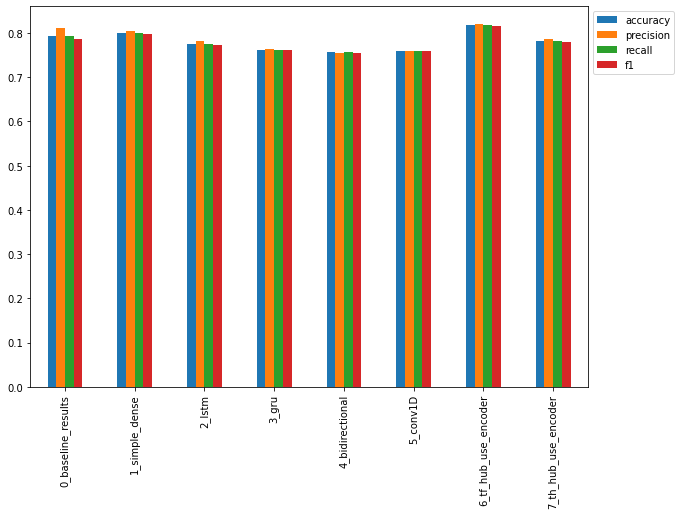

In [ ]:
all_model_results.plot(kind = 'bar', figsize = (10, 7)).legend(bbox_to_anchor = (1.0, 1.0))

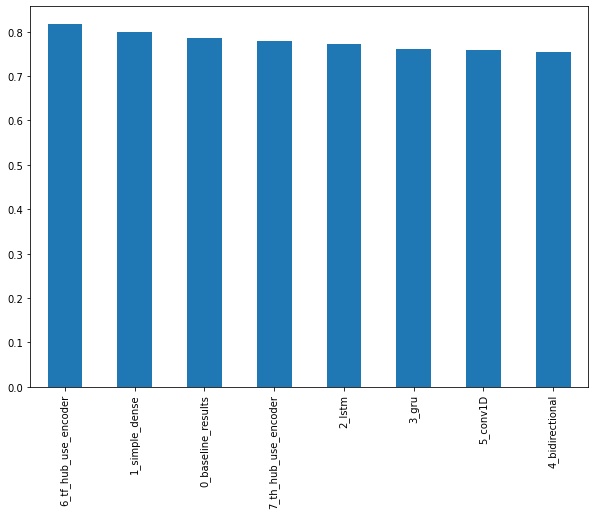

In [ ]:
all_model_results.sort_values('f1', ascending = False)['f1'].plot(kind = 'bar', figsize = (10, 7))

In [ ]:
!tensorboard dev upload --logdir ./model_logs/  \
  --name 'NLP twitter disaster detecter'\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=YAGewix69WctAiJBTkKu8xpRHZMlTO&prompt=consent&access_type=offline

In [ ]:
### https://tensorboard.dev/experiment/3yWimAgVQCmyILT1aay8dA/

In [ ]:
!tensorboard dev list


***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) NO


In [ ]:
model_6.save('model_6.h5')

In [ ]:
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects = {'KerasLayer': hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4263 - accuracy: 0.8176


[0.4263099431991577, 0.817585289478302]

In [ ]:
model_6.save('model_6_SavedModel_format')

In [ ]:
loaded_model_6_SaveModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [ ]:
loaded_model_6_SaveModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4263 - accuracy: 0.8176


[0.4263099133968353, 0.817585289478302]

In [ ]:
model_6.predict(['All rain forests are burning down due to global warming'])

1/1 [==============================] - 0s 31ms/step


array([[0.9354675]], dtype=float32)

In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

24/24 [==============================] - 0s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'preds': model_6_preds,
                       'pred_probs': tf.squeeze(model_6_pred_probs)})

val_df.head()

,text,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.171116
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.741461
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988192
3,@camilacabello97 Internally and externally scr...,1,0.0,0.200146
4,Radiation emergency #preparedness starts with ...,1,1.0,0.749761


In [ ]:
most_wrong = val_df[val_df['target'] != val_df['preds']].sort_values('pred_probs', ascending = False)
most_wrong.head()

,text,target,preds,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.912515
759,FedEx will no longer transport bioterror patho...,0,1.0,0.860867
628,@noah_anyname That's where the concentration c...,0,1.0,0.851484
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.829700
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.828798


In [ ]:
most_wrong.tail()

,text,target,preds,pred_probs
233,I get to smoke my shit in peace,1,0.0,0.043144
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.042312
38,Why are you deluged with low self-image? Take ...,1,0.0,0.042143
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.041430
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.034045


In [ ]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_probs}')
  print(f'Text:\n{text}\n')
  print('---\n')


Target: 0, Pred: 1.0, Prob: 0.91251540184021
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target: 0, Pred: 1.0, Prob: 0.8608672618865967
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target: 0, Pred: 1.0, Prob: 0.8514841198921204
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0, Pred: 1.0, Prob: 0.8297001719474792
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

---

Target: 0, Pred: 1.0, Prob: 0.8287980556488037
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0, Pred: 1.0, Prob: 0.8211127519607544
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we shou

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_probs}')
  print(f'Text:\n{text}\n')
  print('---\n')


Target: 1, Pred: 0.0, Prob: 0.06073834002017975
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

---

Target: 1, Pred: 0.0, Prob: 0.05936873331665993
Text:
@DavidVonderhaar At least you were sincere ??

---

Target: 1, Pred: 0.0, Prob: 0.05907747521996498
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

---

Target: 1, Pred: 0.0, Prob: 0.05403923988342285
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

---

Target: 1, Pred: 0.0, Prob: 0.04898204281926155
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

---

Target: 1, Pred: 0.0, Prob: 0.04314418509602547
Text:
I get to smoke my shit in peace

---

Target: 1, Pred: 0.0, Prob: 0.0423116534948349
Text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUA

In [ ]:
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f'Pred:{pred}, Prob:{pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print('-----\n')

1/1 [==============================] - 0s 30ms/step
Pred:0.0, Prob:0.13698075711727142
Text:
Nuclear-Deal: Indo-Japan pact lies at the heart of two US reactor-based projects - The Indian Express 

Read more... http://t.co/FMxmNNRDFe

-----

1/1 [==============================] - 0s 29ms/step
Pred:0.0, Prob:0.15623879432678223
Text:
So wait he really not gonna tell his wife that he is a mass murderer now and a cheat #derailed @itv2...I'm done with this film ????

-----

1/1 [==============================] - 0s 28ms/step
Pred:1.0, Prob:0.9903624653816223
Text:
Hundreds of commuters abandoned at LRT station during severe hailstorm http://t.co/vMIGkJ0tkZ

-----

1/1 [==============================] - 0s 31ms/step
Pred:0.0, Prob:0.22115199267864227
Text:
@maeisdumb WHOAHAHAHAHHDJS electrocute me....

-----

1/1 [==============================] - 0s 33ms/step
Pred:0.0, Prob:0.12457671016454697
Text:
Twitter will explode...light the match @realmandyrain

-----

1/1 [=========================